## 4.1 Load Feature-Engineered Data

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
DATA_PATH = "../data/processed/feature_engineered_inventory.csv"
df = pd.read_csv(DATA_PATH)

df.head()

,product_id,product_name,catagory,supplier_id,supplier_name,stock_quantity,reorder_level,reorder_quantity,unit_price,date_received,...,inventory_turnover_rate,status,supply_demand_gap,inventory_turnover_calc,reorder_pressure,inventory_age_days,days_since_last_order,stockout_flag,overstock_flag,mismatch_risk
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,4.5,2024-08-16,...,19,Discontinued,-10,1.391304,50,34.0,563.0,1,0,High
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,20.0,NaN,...,1,Discontinued,-40,1.847826,32,0.0,594.0,1,0,High
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,6.0,NaN,...,34,Backordered,-1,1.000000,8,0.0,508.0,1,0,High
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,1.5,NaN,...,99,Active,-83,7.307692,47,0.0,328.0,1,0,High
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,4.0,NaN,...,25,Backordered,-25,1.631579,-7,0.0,508.0,1,0,High


## 4.2 Define Features & Target

In [35]:
# Binary target: High risk = 1, else = 0
df["high_risk_flag"] = (df["mismatch_risk"] == "High").astype(int)

df["high_risk_flag"].value_counts()

high_risk_flag
1    529
0    461
Name: count, dtype: int64

In [36]:
feature_cols = [
    "reorder_level",
    "reorder_quantity",
    "unit_price",
    "reorder_pressure",
    "inventory_age_days",
    "days_since_last_order"
]

X = df[feature_cols]
y = df["high_risk_flag"]

In [37]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

le.classes_

array([0, 1])

## 4.3 Train–Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 4.4 Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.5 Baseline Model — Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
confusion_matrix(y_test, y_pred_lr)

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        92
           1       0.81      0.78      0.79       106

    accuracy                           0.78       198
   macro avg       0.78      0.78      0.78       198
weighted avg       0.78      0.78      0.78       198



array([[72, 20],
       [23, 83]])

## 4.6 Advanced Model — Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=10,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

Random Forest Results
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        92
           1       0.78      0.69      0.73       106

    accuracy                           0.73       198
   macro avg       0.74      0.74      0.73       198
weighted avg       0.74      0.73      0.73       198



array([[72, 20],
       [33, 73]])

## 4.7 Feature Importance

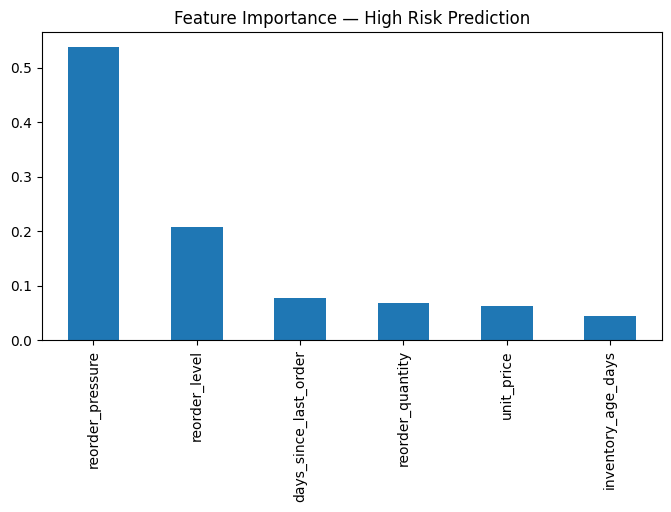

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(
    rf.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

importances.plot(kind="bar", figsize=(8,4))
plt.title("Feature Importance — High Risk Prediction")
plt.show()

## 4.8 Model Comparison Summary
• Logistic Regression used as interpretable baseline                                                         
• Random Forest improved recall for High-risk cases                                                            
• Tree-based model selected for deployment

## 4.9 Save Model & Scaler

In [44]:
import joblib

joblib.dump(rf, "../models/mismatch_risk_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(le, "../models/label_encoder.pkl")

['../models/label_encoder.pkl']